This script aims to analyse surveillance data with respect to the reigning coalitions.

In [33]:
import pandas as pd
from itertools import chain, combinations


df = pd.read_csv('../dat/tele_and_gov_data.csv', index_col=0)
df

,BB,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE,...,ST_SPD,TH,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
2013,289,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,2046,...,21.5,336,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2016,301,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,498,...,10.6,201,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2019,136,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1592,...,10.6,282,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2020,267,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1358,...,10.6,271,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2021,207,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1297,...,8.4,242,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2


In [34]:
#make a powerset of all possible coalitions out of these 4 parties:
coalitions = []
parties = ['CDU', 'SPD', 'FDP', 'Grüne', 'Linke', 'FW']
for i in range(1, len(parties)+1):
    coalitions += list(combinations(parties, i))
coalitions

[('CDU',),
 ('SPD',),
 ('FDP',),
 ('Grüne',),
 ('Linke',),
 ('FW',),
 ('CDU', 'SPD'),
 ('CDU', 'FDP'),
 ('CDU', 'Grüne'),
 ('CDU', 'Linke'),
 ('CDU', 'FW'),
 ('SPD', 'FDP'),
 ('SPD', 'Grüne'),
 ('SPD', 'Linke'),
 ('SPD', 'FW'),
 ('FDP', 'Grüne'),
 ('FDP', 'Linke'),
 ('FDP', 'FW'),
 ('Grüne', 'Linke'),
 ('Grüne', 'FW'),
 ('Linke', 'FW'),
 ('CDU', 'SPD', 'FDP'),
 ('CDU', 'SPD', 'Grüne'),
 ('CDU', 'SPD', 'Linke'),
 ('CDU', 'SPD', 'FW'),
 ('CDU', 'FDP', 'Grüne'),
 ('CDU', 'FDP', 'Linke'),
 ('CDU', 'FDP', 'FW'),
 ('CDU', 'Grüne', 'Linke'),
 ('CDU', 'Grüne', 'FW'),
 ('CDU', 'Linke', 'FW'),
 ('SPD', 'FDP', 'Grüne'),
 ('SPD', 'FDP', 'Linke'),
 ('SPD', 'FDP', 'FW'),
 ('SPD', 'Grüne', 'Linke'),
 ('SPD', 'Grüne', 'FW'),
 ('SPD', 'Linke', 'FW'),
 ('FDP', 'Grüne', 'Linke'),
 ('FDP', 'Grüne', 'FW'),
 ('FDP', 'Linke', 'FW'),
 ('Grüne', 'Linke', 'FW'),
 ('CDU', 'SPD', 'FDP', 'Grüne'),
 ('CDU', 'SPD', 'FDP', 'Linke'),
 ('CDU', 'SPD', 'FDP', 'FW'),
 ('CDU', 'SPD', 'Grüne', 'Linke'),
 ('CDU', 'SPD', 'Grü

In [37]:
# Iterate over the states
coalitions = set()
for i in range(0, len(df.columns)-1, 9):
    window = df.iloc[:, i:i+9]
    state = window.columns[0]
    # Iterate over the rows
    for row in window.iloc[:,5:8].values:
        # Convert the row to a tuple and add it to the set
        coalitions.add(tuple(row))
print(coalitions)

{('SPD', 'Grüne', 'CDU'), ('SPD', 'Grüne', 0.0), ('CDU', 'SPD', '0'), ('Grüne', 'CDU', 0.0), ('CDU', 'Grüne', 0.0), ('SPD', 'Grüne', 'Linke'), ('CDU', '0', 0), ('SPD', 'CDU', 0.0), ('CDU', 'FDP', '0'), ('SPD', 'Linke', '0'), ('SPD', '0', 0.0), ('CDU', 'Grüne', 'SPD'), ('SPD', 'Grüne', '0'), ('CDU', 'SPD', 'Grüne'), ('Grüne', 'SPD', 0.0), ('SPD', 'Grüne', 'SSW'), ('SPD', 'FDP', 'Grüne'), ('CDU', 'SPD', 0), ('CDU', 'FW', 0), ('SPD', 'Grüne', 'FDP'), ('Linke', 'SPD', 'Grüne'), ('CDU', 'FDP', 0.0), ('SPD', 'Linke', 0.0)}


In [41]:
# Initialize the dictionary
coalitions = {}

# Iterate over the states
for i in range(0, len(df.columns)-1, 9):
    window = df.iloc[:, i:i+9]
    state = window.columns[0]
    # Iterate over the rows
    for _ ,row in window.iterrows():
        # Convert the row to a tuple
        coalition = tuple(row[5:8].values.tolist())
        # If the coalition is already in the dictionary, increment its count
        if coalition in coalitions:
            coalitions[coalition][0] += 1
            coalitions[coalition][1] += row.iloc[0]
        # Otherwise, add the coalition to the dictionary with a count of 1
        else:
            coalitions[coalition] = [1, row.iloc[0]]

print(coalitions)

{('SPD', 'Linke', '0'): [2, 590], ('SPD', 'Grüne', 'CDU'): [3, 610], ('CDU', 'SPD', '0'): [4, 3023], ('SPD', 'Grüne', 'Linke'): [7, 5243], ('Grüne', 'SPD', 0.0): [1, 2193], ('Grüne', 'CDU', 0.0): [4, 9664], ('CDU', '0', 0): [2, 5734], ('CDU', 'FW', 0): [3, 11731], ('SPD', 'Grüne', '0'): [3, 2030], ('CDU', 'Grüne', 0.0): [5, 15331], ('SPD', '0', 0.0): [1, 1175], ('SPD', 'Grüne', 0.0): [8, 12515], ('SPD', 'CDU', 0.0): [7, 7451], ('SPD', 'Linke', 0.0): [1, 283], ('CDU', 'FDP', 0.0): [3, 3269], ('SPD', 'FDP', 'Grüne'): [3, 1103], ('SPD', 'Grüne', 'FDP'): [1, 438], ('SPD', 'Grüne', 'SSW'): [2, 413], ('CDU', 'Grüne', 'SPD'): [6, 3859], ('CDU', 'SPD', 0): [5, 425], ('CDU', 'FDP', '0'): [1, 1135], ('CDU', 'SPD', 'Grüne'): [4, 1520], ('Linke', 'SPD', 'Grüne'): [4, 996]}


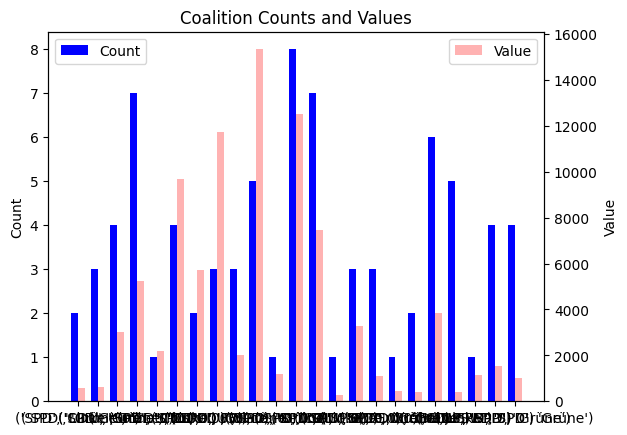

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the dictionary to a DataFrame
df_coalitions = pd.DataFrame.from_dict(coalitions, orient='index', columns=['Count', 'Value'])

# Define the bar width and positions
bar_width = 0.35
r1 = np.arange(len(df_coalitions))
r2 = [x + bar_width for x in r1]

fig, ax1 = plt.subplots()

# Create a bar plot of the 'Count' column
ax1.bar(r1, df_coalitions['Count'], color='blue', width=bar_width, label='Count')
ax1.set_ylabel('Count')

# Create a secondary y-axis and create a bar plot of the 'Value' column
ax2 = ax1.twinx()
ax2.bar(r2, df_coalitions['Value'], color='red', width=bar_width, label='Value', alpha=0.3)
ax2.set_ylabel('Value')

# Set the labels of the x-axis and title
plt.xlabel('Coalition')
plt.title('Coalition Counts and Values')

# Set the xticks to be the middle of the two bars
plt.xticks([r + bar_width / 2 for r in range(len(df_coalitions))], df_coalitions.index, rotation=90)
#plt.xticks(df_coalitions.index, rotation=90)
# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()